In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

# model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
from google.colab import auth
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np

class MultiArchitecture(nn.Module):
    def __init__(self):
        super().__init__()
        self.alayer1 = nn.Linear(8,20)
        self.alayerad = nn.Linear(20,40)
        self.alayer2 = nn.Linear(40,80)
        self.alayer3 = nn.Linear(80,40)
        self.alayerad2 = nn.Linear(40,20)
        self.alayer4 = nn.Linear(20,1)
        self.blayer1 = nn.Linear(8,20)
        self.blayerad = nn.Linear(20,40)
        self.blayer2 = nn.Linear(40,80)
        self.blayer3 = nn.Linear(80,40)
        self.blayerad2 = nn.Linear(40,20)
        self.blayer4 = nn.Linear(20,1)
        self.clayer1 = nn.Linear(2,10)
        self.clayerad = nn.Linear(10,20)
        self.clayer2 = nn.Linear(20,40)
        self.clayer3 = nn.Linear(40,20)
        self.clayerad2 = nn.Linear(20,10)
        self.clayer4 = nn.Linear(10,1)
        self.relu=nn.LeakyReLU() 
 
    def forward(self, xa, xb):
        ou = self.alayer1(xa)
        ou = self.relu(ou)
        ou = self.alayerad(ou)
        ou = self.relu(ou)
        ou = self.alayer2(ou)
        ou = self.relu(ou)
        ou = self.alayer3(ou)
        ou = self.relu(ou)
        ou = self.alayerad2(ou)
        ou = self.relu(ou)
        ou = self.alayer4(ou)
        t = self.blayer1(xb)
        t = self.relu(t)
        t = self.blayerad(t)
        t = self.relu(t)
        t = self.blayer2(t)
        t = self.relu(t)
        t = self.blayer3(t)
        t = self.relu(t)
        t = self.blayerad2(t)
        t = self.relu(t)
        t = self.blayer4(t)
        out = torch.cat((ou,t),dim=1)
        out = self.clayer1(out)
        out = self.relu(out)
        out = self.clayerad(out)
        out = self.relu(out)
        out = self.clayer2(out)
        out = self.relu(out)
        out = self.clayer3(out)
        out = self.relu(out)
        out  = self.clayerad2(out)
        out = self.relu(out)
        out = self.clayer4(out)
        return out


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
from google.colab import auth
from google.colab import drive
import pandas as pd

filename1 = '/content/drive/MyDrive/BIG DATA/TFF.csv'
filename2 = '/content/drive/MyDrive/BIG DATA/dataF.csv'

TF = pd.read_csv(filename1)
TF = TF.loc[0:99999]
data = pd.read_csv(filename2)
data = data.loc[0:99999]
gpu = 'cuda' if torch.cuda.is_available() else 'cpu'
dnumber = 156396
# for reproducibility
torch.manual_seed(777)
if gpu == 'cuda':
    torch.cuda.manual_seed_all(777)

class com :
  def tf(self,name):
    label = 'change_' + name
    turn = torch.FloatTensor(data[label].values)
    turn1 = turn.view(100000,1)
    return turn1

x1 = com()
x2 = com()
x3 = com()
x4 = com()
x5 = com()
x6 = com()
x7 = com()
x8 = com()
x_1 = x1.tf('1')
x_2 = x2.tf('2')
x_3 = x3.tf('3')
x_4 = x4.tf('5')
x_5 = x5.tf('10')
x_6 = x6.tf('20')
x_7 = x7.tf('30')
x_8 = x8.tf('40')


xtrain1 = torch.stack([x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8], dim=-1)
xtrain = xtrain1.view(100000,8)
x_train = torch.FloatTensor(xtrain)

class bom :
  def tf(self,name):
    label = 'volume_' + name
    turn = torch.FloatTensor(data[label].values)
    turn1 = turn.view(100000,1)
    return turn1

t1 = bom()
t2 = bom()
t3 = bom()
t4 = bom()
t5 = bom()
t6 = bom()
t7 = bom()
t8 = bom()
t_1 = t1.tf('1')
t_2 = t2.tf('2')
t_3 = t3.tf('3')
t_4 = t4.tf('5')
t_5 = t5.tf('10')
t_6 = t6.tf('20')
t_7 = t7.tf('30')
t_8 = t8.tf('40')



xb_train1 = torch.stack([t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8], dim = -1)
xb_train2 = xb_train1.view(100000,8)
xb_train = torch.FloatTensor(xb_train2)

ytrain = torch.FloatTensor(TF['change_2'].values)
ytrain1 = ytrain.view(100000,1)
y_train = torch.FloatTensor(ytrain1)

model = MultiArchitecture()
loss_func = nn.L1Loss().to(gpu)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.000001)
model = model.to(gpu)
xa = x_train.to(gpu)
xb = xb_train.to(gpu)
y_noise = y_train.to(gpu)
num_epoch = 100000
loss_array = []
beset_model_wts = model.state_dict()
for epoch in range(num_epoch):
    optimizer.zero_grad()
    output = model(xa,xb)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    if epoch % 300 == 0:
        print('epoch:', epoch, ' loss:', loss.item())
plt.plot(loss_array)
plt.show()
model_save_name = 'classifierF.pt'
path = F"/content/drive/My Drive/{model_save_name}" 
torch.save(model.state_dict(), path)
        

# back test

In [ ]:
src = list(files.upload().values())[0] 
open('backtest.py','wb').write(src) 
import backtest



lperform:
-104.70000000001164
sperform:
-244.3399999999965


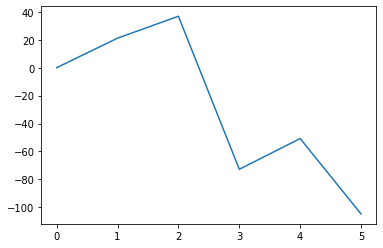

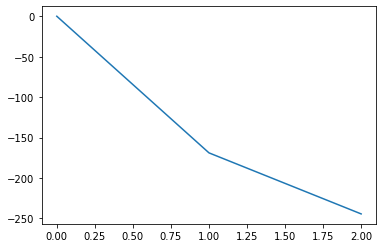

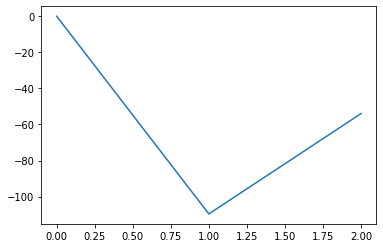

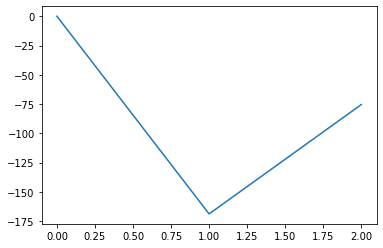

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
from google.colab import auth
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
class backtest:
  def start(self,start,end,lin,lout,sin,sout,x_a,x_b,data, model_wts):
    self.end = end
    self.start = start
    self.lin = lin
    self.lout = lout
    self.sin = sin
    self.sout = sout
    self.data = data
    self.x_a = x_a
    self.model_wts = model_wts
    self.data = data
    close = self.data['close'].values
    self.close = close
    model = MultiArchitecture()
    model.load_state_dict(torch.load(self.model_wts))
    s , l = 0,0
    i = self.start
    lb = []
    lopen = 0
    lclose = 0
    ls = []
    sb = []
    sopen = 0
    sclose = 0
    ss = []
    for i in range(self.start, self.end + 1):
      xa = torch.FloatTensor(x_a[i,:])
      
      xb = torch.FloatTensor(x_b[i,:])
      
      target = model(xa,xb)
      price = self.close[i]
      if target > self.lin and l == 0 and s == 0:
        lb.append(price)
        l += 1
        lopen += 1
      if target < self.lout and l == 1 and s == 0:
        ls.append(price)
        l += -1
        lclose += 1
      if target < self.sin and l == 0 and s == 0:
        sb.append(price)
        s += 1
        sopen += 1
      if target > self.sout and l == 0 and s ==1 :
        ss.append(price)
        s += -1
        sclose += 1
    if lopen != lclose:
      lb = lb[0:-1]
    if sopen != sclose:
      sb = sb[0:-1]
    lperform = sum(ls) - sum(l(49961, 40, 16)
(49961, 51)
cuda
Epoch: 0100 cost = 0.018887
Epoch: 0100 accuracy = 0.018406
b) - lopen*35
    sperform = sum(sb) - sum(ss) - sopen*35
    print('lperform:')
    print(lperform)
    print('sperform:')
    print(sperform)
    lper = []
    sper = []
    lgraph = [0]
    ldraw = [0]
    sgraph = [0]
    sdraw = [0]
    for i in range(len(lb)):
      val = ls[i] - lb[i] - 35
      lper.append(val)
    for i in range(len(sb)):
      val = sb[i] - ss[i] - 35
      sper.append(val)
    for phase in ['long','short']:
      if phase == 'long':
        for i in range(len(lper)):
          gap = lper[i]
          lgraph.append(gap + lgraph[-1])
          if gap < 0:
            ldraw.append(gap)
      if phase == 'short':
        for i in range(len(sper)):
          gap = sper[i]
          sgraph.append(gap + sgraph[-1])
          if gap < 0:
            sdraw.append(gap)
    lgraph_df = pd.DataFrame(lgraph)
    sgraph_df = pd.DataFrame(sgraph)
    ldraw_df = pd.DataFrame(ldraw)
    sdraw_df = pd.DataFrame(sdraw)
    plt.plot(lgraph_df)
    plt.show()
    plt.plot(sgraph_df)
    plt.show()
    plt.plot(ldraw_df)
    plt.show()
    plt.plot(sdraw_df)
    plt.show()

class MultiArchitecture(nn.Module):
    def __init__(self):
        super().__init__()
        self.alayer1 = nn.Linear(8,20)
        self.alayerad = nn.Linear(20,40)
        self.alayer2 = nn.Linear(40,80)
        self.alayer3 = nn.Linear(80,40)
        self.alayerad2 = nn.Linear(40,20)
        self.alayer4 = nn.Linear(20,1)
        self.blayer1 = nn.Linear(8,20)
        self.blayerad = nn.Linear(20,40)
        self.blayer2 = nn.Linear(40,80)
        self.blayer3 = nn.Linear(80,40)
        self.blayerad2 = nn.Linear(40,20)
        self.blayer4 = nn.Linear(20,1)
        self.clayer1 = nn.Linear(2,10)
        self.clayerad = nn.Linear(10,20)
        self.clayer2 = nn.Linear(20,40)
        self.clayer3 = nn.Linear(40,20)
        self.clayerad2 = nn.Linear(20,10)
        self.clayer4 = nn.Linear(10,1)
        self.relu=nn.LeakyReLU() 
 
    def forward(self, xa, xb):
        ou = self.alayer1(xa)
        ou = self.relu(ou)
        ou = self.alayerad(ou)
        ou = self.relu(ou)
        ou = self.alayer2(ou)
        ou = self.relu(ou)
        ou = self.alayer3(ou)
        ou = self.relu(ou)
        ou = self.alayerad2(ou)
        ou = self.relu(ou)
        ou = self.alayer4(ou)
        
        t = self.blayer1(xb)
        t = self.relu(t)
        t = self.blayerad(t)
        t = self.relu(t)
        t = self.blayer2(t)
        t = self.relu(t)
        t = self.blayer3(t)
        t = self.relu(t)
        t = self.blayerad2(t)
        t = self.relu(t)
        t = self.blayer4(t)
        
        out = torch.cat((ou,t),dim=-1)
        out = self.clayer1(out)
        out = self.relu(out)
        out = self.clayerad(out)
        out = self.relu(out)
        out = self.clayer2(out)
        out = self.relu(out)
        out = self.clayer3(out)
        out = self.relu(out)
        out  = self.clayerad2(out)
        out = self.relu(out)
        out = self.clayer4(out)
        return out


model = MultiArchitecture()
dnum = 156396
filename1 = '/content/drive/MyDrive/BIG DATA/TFF.csv'
filename2 = '/content/drive/MyDrive/BIG DATA/dataF.csv'

TF = pd.read_csv(filename1)
data = pd.read_csv(filename2)

class com :
  def tf(self,name):
    label = 'change_' + name
    turn = torch.FloatTensor(data[label].values)
    turn1 = turn.view(dnum,1)
    return turn1

x1 = com()
x2 = com()
x3 = com()
x4 = com()
x5 = com()
x6 = com()
x7 = com()
x8 = com()
x_1 = x1.tf('1')
x_2 = x2.tf('2')
x_3 = x3.tf('3')
x_4 = x4.tf('5')
x_5 = x5.tf('10')
x_6 = x6.tf('20')
x_7 = x7.tf('30')
x_8 = x8.tf('40')


xtrain1 = torch.stack([x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8], dim=-1)
xtrain = xtrain1.view(dnum,8)
xa_train = torch.FloatTensor(xtrain)
x_a = xa_train.numpy()

class bom :
  def tf(self,name):
    label = 'volume_' + name
    turn = torch.FloatTensor(data[label].values)
    turn1 = turn.view(dnum,1)
    return turn1

t1 = bom()
t2 = bom()
t3 = bom()
t4 = bom()
t5 = bom()
t6 = bom()
t7 = bom()
t8 = bom()
t_1 = t1.tf('1')
t_2 = t2.tf('2')
t_3 = t3.tf('3')
t_4 = t4.tf('5')
t_5 = t5.tf('10')
t_6 = t6.tf('20')
t_7 = t7.tf('30')
t_8 = t8.tf('40')

xb_train1 = torch.stack([t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8], dim = -1)
xb_train2 = xb_train1.view(dnum,8)
xb_train = torch.FloatTensor(xb_train2)
x_b = xb_train.numpy()

bt = backtest()
bt.start(start=100000 , end= 100100, lin = 0.8 , lout = 0.6 , sin = 0.2 , sout = 0.4 , x_a = x_a , x_b = x_b , data = data , model_wts = '/content/drive/MyDrive/classifierF.pt')
